In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import noisereduce as nr
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import python_speech_features as mf
import pandas as pd
import os

In [ ]:
audio_dataset_path=r"Dataset"
metadata=pd.read_csv(r"REFERENCE.csv",names = ['file','label'])

In [ ]:
metadata[metadata.label==1]

,file,label
0,a0001,1
1,a0002,1
2,a0003,1
3,a0004,1
4,a0005,1
...,...,...
3215,f0090,1
3218,f0093,1
3221,f0096,1
3224,f0099,1


In [ ]:
def feature_1(file):
    audio,sr = librosa.load(file)
    zcr = librosa.zero_crossings(audio)
    zcr = sum(zcr)
    data = pd.DataFrame([zcr],columns=['A'])
    return data

In [ ]:
def feature_2(file):
    audio,sr = librosa.load(file)
    #mfcc=np.mean(librosa.feature.mfcc(audio,sr = sr,n_mfcc=12).T,axis=0)
    mfcc_feature =np.mean(mf.mfcc(audio,sr, 0.025, 0.01,12,nfft = 1200, appendEnergy = True),axis = 0)     
    #mfcc_feature = preprocessing.scale(mfcc_feature)
    mfcc = pd.DataFrame(mfcc_feature)
    #df1 = pd.DataFrame(mfcc)
    #df1 = df1.T
    mfcc = mfcc.T
    return mfcc

In [ ]:
def feature_3(file):
    audio,sr = librosa.load(file)
    chromagram =np.mean(librosa.feature.chroma_stft(audio, sr=sr, hop_length=512),axis=1)  
    cr = pd.DataFrame(chromagram)
    #df1 = pd.DataFrame(mfcc)
    #df1 = df1.T
    cr = cr.T
    return cr

In [ ]:
data_1 = pd.DataFrame()
data_2 = pd.DataFrame()
data_3 = pd.DataFrame()

In [ ]:
data_1 = pd.DataFrame()
data_2 = pd.DataFrame()
data_3 = pd.DataFrame()
#parser function works!!!!!
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file"])+'.wav')
    temp_1 = feature_1(file_name)
    temp_2 = feature_2(file_name)
    temp_3 = feature_3(file_name)
    data_1 = data_1.append(temp_1)
    data_2 = data_2.append(temp_2)
    data_3 = data_3.append(temp_3)

4it [00:19,  4.54s/it]E:\Program Files\Python\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
207it [15:42,  4.27s/it]

In [ ]:
data_1

,A
0,4556
0,3311
0,2184
0,2869
0,2522
...,...
0,1040
0,3624
0,2728
0,1952


In [ ]:
result = pd.concat([data_1,data_2,data_3], axis=1, ignore_index=True)


In [ ]:
result.to_csv('result.csv', index=False)

In [ ]:
result=pd.read_csv('result.csv')
result.columns =result.columns.astype(int)


In [ ]:
#metadata=pd.read_csv(r"Project\data.csv",names = ['file','fold','label'])

In [ ]:
label = metadata['label']

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(result,label)
mutual_info

array([0.02406129, 0.03196684, 0.00116312, 0.06781247, 0.05888958,
       0.04265933, 0.02105569, 0.0479184 , 0.06562446, 0.0538081 ,
       0.02475763, 0.01717168, 0.04044707, 0.        , 0.04929566,
       0.01926901, 0.        , 0.04920135, 0.01463723, 0.00316901,
       0.02069477, 0.042626  , 0.0186197 , 0.01444482, 0.02575753])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = result.columns
mutual_info.sort_values(ascending=False)

3     0.067812
8     0.065624
4     0.058890
9     0.053808
14    0.049296
17    0.049201
7     0.047918
5     0.042659
21    0.042626
12    0.040447
1     0.031967
24    0.025758
10    0.024758
0     0.024061
6     0.021056
20    0.020695
15    0.019269
22    0.018620
11    0.017172
18    0.014637
23    0.014445
19    0.003169
2     0.001163
13    0.000000
16    0.000000
dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(result[[3, 8, 4, 9, 14, 17]],label,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(x_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    

    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 62.1951%
Log Loss: 2.9857877230350116
SVC
****Results****
Accuracy: 70.7317%
Log Loss: 0.5570882838564251
DecisionTreeClassifier
****Results****
Accuracy: 69.5122%
Log Loss: 10.53011475454594
RandomForestClassifier
****Results****
Accuracy: 75.6098%
Log Loss: 0.5049864418131292
AdaBoostClassifier
****Results****
Accuracy: 74.3902%
Log Loss: 0.6611332662454502
GradientBoostingClassifier
****Results****
Accuracy: 81.7073%
Log Loss: 0.48465263615219206
GaussianNB
****Results****
Accuracy: 57.3171%
Log Loss: 0.7355528184268023
LinearDiscriminantAnalysis
****Results****
Accuracy: 76.8293%
Log Loss: 0.5026758982769205
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 67.0732%
Log Loss: 0.6275750526355764


In [ ]:
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred, y_test))

0.8170731707317073


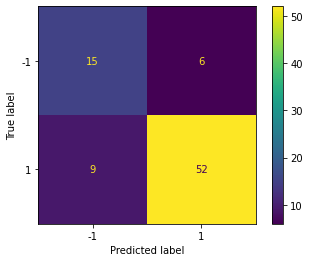

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

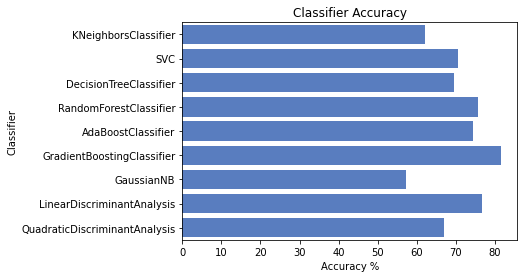

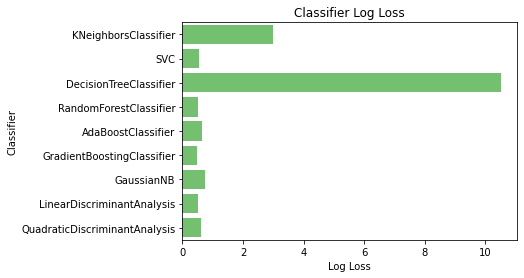

In [ ]:
import seaborn as sns
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 5, step = 100)
rfe_selector.fit(result, label)
result.columns[rfe_selector.get_support()]

Int64Index([3, 4, 7, 8, 9], dtype='int64')

In [ ]:
from sklearn.feature_selection import SelectFromModel
# #Selecting the Best important features according to Logistic Regression using SelectFromModel
sfm_selector = SelectFromModel(estimator=RandomForestClassifier())
sfm_selector.fit(result, label)
result.columns[sfm_selector.get_support()]

Int64Index([0, 1, 5, 6, 7, 10, 11, 12, 18], dtype='int64')

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
#Selecting the Best important features according to Logistic Regression
sfs_selector = SequentialFeatureSelector(estimator=RandomForestClassifier(), n_features_to_select = 3, cv =10, direction ='backward')
sfs_selector.fit(result, label)
result.columns[sfs_selector.get_support()]

Int64Index([0, 4, 10], dtype='int64')